<a href="https://colab.research.google.com/github/prathamadh/eve/blob/Pratham/usingroboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%cd /content/drive/MyDrive/yolocauliv2/yolov5/
%pwd

/content/drive/MyDrive/yolocauliv2/yolov5


'/content/drive/MyDrive/yolocauliv2/yolov5'

In [73]:
#!pip install roboflow



from roboflow import Roboflow
rf = Roboflow(api_key="vbVrgdwZya33R5lPJUuQ")
project = rf.workspace("ioe-uykpw").project("thakisake")
dataset = project.version(1).download("yolov5")




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to thakisake-1 in yolov5pytorch:: 100%|██████████| 114/114 [00:01<00:00, 108.72it/s]


In [31]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [44]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-16 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [74]:
! python train.py  --batch 16 --epochs 150 --data /content/drive/MyDrive/yolocauliv2/yolov5/thakisake-1/data.yaml --weights yolov5s.pt --workers 2 --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolocauliv2/yolov5/thakisake-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0

In [17]:
%cd yolov5

/content/drive/MyDrive/yolocauliv2/yolov5


loading custom model

In [75]:
model1 = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolocauliv2/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-16 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [81]:
img1='/content/drive/MyDrive/yolocauliv2/yolov5/thakisake-1/test/images/cauli17_jpeg.rf.99a4e57baa7fee8b0130d28308b58c9f.jpg'
img ='/content/drive/MyDrive/yolocauliv2/yolov5/thakisake-1/test/images/cauli23_jpeg.rf.207cedc4a4a3ec0f372851f494303f2d.jpg'
results=model1(img1)
results.print()


image 1/1: 640x640 1 cauli
Speed: 14.7ms pre-process, 12.6ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


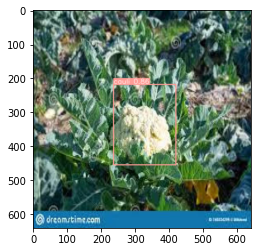

In [82]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:

from utils.plots import plot_results
plot_results('/content/drive/MyDrive/yolocauli/runs/train/exp10/results.csv') 

In [ ]:
y